# EDA True vs. Fake Reviews

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')    # fivethirtyeight, ggplot, seaborn
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
file = 'source/df_true_backup.pkl'
df_true = pd.read_pickle(file)
print(df_true.shape)
df_true.head()

(390, 11)


,title,text,name,date,stars,color,is_vine_voice,has_images,found_helpful,verified_purchase,lang
0,Love em,Verified Purchase\nThese are great. Used them ...,Mommyonthego,2023-09-02,5,black,False,False,1,True,ENGLISH
1,Amazing for the cost,I originally got these for my wife. After seei...,William,2022-09-15,5,NaN,False,False,4,True,ENGLISH
2,Great for mowing,I purchased these to replace a pair I've had f...,Laurie W.,2022-08-29,5,NaN,False,False,10,True,ENGLISH
3,ANC is pretty good,Very comfortable headphones to wear. As a pers...,SavvyShopper,2022-05-28,5,NaN,False,False,12,True,ENGLISH
4,Fantastic Sound,The sound of these are fantastic. I purchased ...,Tom43876,2022-10-20,5,NaN,False,False,10,True,ENGLISH


In [3]:
file = 'source/df_fake_backup.pkl'
df_fake = pd.read_pickle(file)
print(df_fake.shape)
df_fake.head()

(354, 11)


,title,text,name,date,stars,color,is_vine_voice,has_images,found_helpful,verified_purchase,lang
0,A17 great bang for your buck. And waterprooof.,They are great ear buds they are loud and the ...,Charles,2023-07-23,5,NaN,False,True,16,True,ENGLISH
1,Simple to pair to phone and High quality sound,This is a review for the Boloxa wireless headp...,Cloudy,2023-08-23,5,NaN,False,False,5,True,ENGLISH
3,"Comfortable, great sounding headphones that ac...",After buying various in-ear headphones for wal...,Ryan,2023-07-20,5,NaN,False,False,1,True,ENGLISH
5,Great sound and so easy to setup,Set up was a breeze. The package comes with cl...,John C,2023-08-08,5,NaN,False,True,2,True,ENGLISH
6,Good value for price,The Boloxa A17 Bluetooth earbuds offer an exce...,Nic,2023-07-19,5,NaN,False,False,1,True,ENGLISH


In [10]:
# null values
print(df_true.shape)
print(df_true.notna().sum(), '\n\n')
print(df_fake.shape)
print(df_fake.notna().sum())

(390, 11)
title                390
text                 390
name                 390
date                 390
stars                390
color                270
is_vine_voice        390
has_images           390
found_helpful        390
verified_purchase    390
lang                 390
dtype: int64 


(354, 11)
title                354
text                 354
name                 354
date                 354
stars                354
color                114
is_vine_voice        354
has_images           354
found_helpful        354
verified_purchase    354
lang                 354
dtype: int64


# Review Length
No surprises fake vs. true reviews

In [4]:
df_true['char_len'] = df_true['text'].apply(lambda x: len(x))
df_true['word_len'] = df_true['text'].apply(lambda x: len(x.split()))

df_fake['char_len'] = df_fake['text'].apply(lambda x: len(x))
df_fake['word_len'] = df_fake['text'].apply(lambda x: len(x.split()))

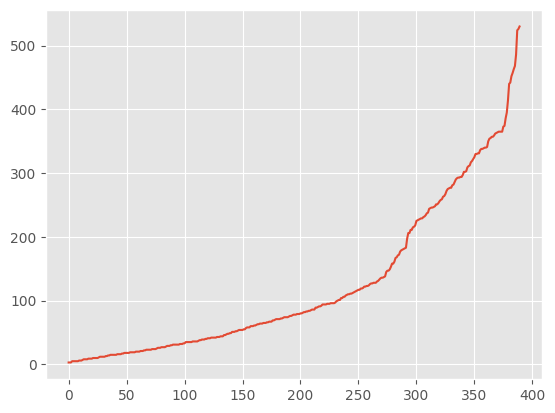

In [6]:
data = sorted(df_true['word_len'].values)
plt.plot(data)

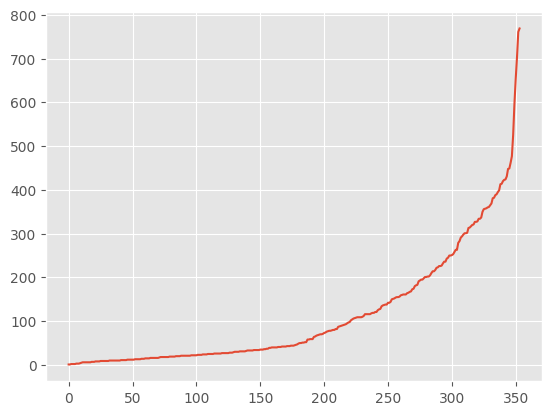

In [7]:
data = sorted(df_fake['word_len'].values)
plt.plot(data)

In [14]:
df_fake[ df_fake['word_len']<5 ]

,title,text,name,date,stars,color,is_vine_voice,has_images,found_helpful,verified_purchase,lang,char_len,word_len
269,They were a gift,They work fine.,Jennifer Abate,2023-09-06,5,black,False,False,0,True,Unknown,15,3
271,Quality,Good product,Good product,2023-09-08,5,black,False,False,0,True,Unknown,12,2
275,Waterproof,Great for swimming,Terry,2023-09-05,5,white,False,False,0,True,ENGLISH,18,3
280,Good,Good,Sonya Godfrey,2023-09-03,5,black,False,False,0,True,Unknown,4,1
284,Works great,Love them,Angela M. Mcbroom,2023-08-31,5,white,False,False,0,True,Unknown,9,2
285,Wonderful,Wonderful,Samantha,2023-08-31,5,white,False,True,0,True,Unknown,9,1
352,Headset,Verified Purchase\nGreat product,Elizabeth Jo Block-Kloss,2023-09-07,5,black,False,False,0,False,ENGLISH,31,4
370,Good product,Good product,pigchop,2023-08-22,5,NaN,False,False,0,True,Unknown,12,2
375,Great headphones!,Excellent value.,Cameron Ruppe,2023-08-15,5,NaN,False,False,0,True,Unknown,16,2
377,Good headphones,They work great,Eric B. Dow,2023-08-12,5,NaN,False,False,0,True,ENGLISH,15,3


# Color

In [7]:
df_true['color'].value_counts()

black            240
green              6
navy blue          6
dark green         4
shadow gray        4
purple             4
rose gold          3
white              2
earhooks-gold      1
Name: color, dtype: int64

In [8]:
df_fake['color'].value_counts()

white    77
black    36
red       1
Name: color, dtype: int64

# Found helpful

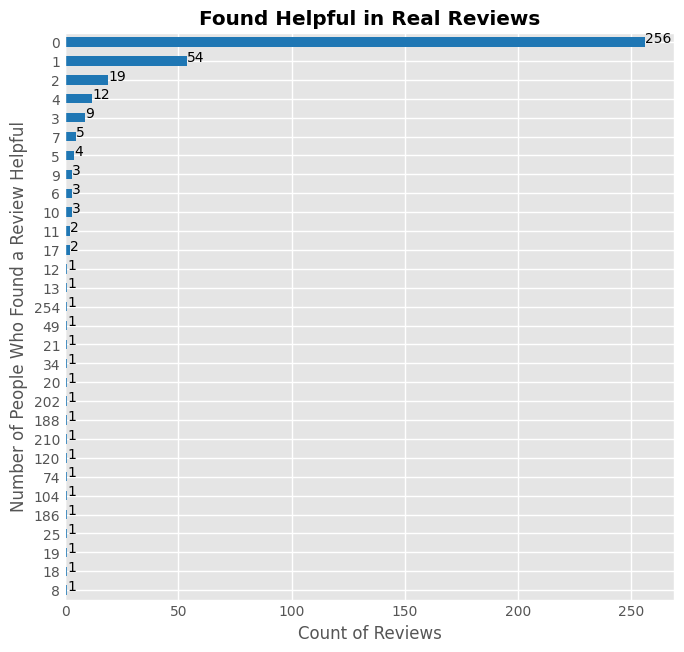

In [31]:
plt.figure( figsize=(7,7))
s = df_true['found_helpful'].value_counts().sort_values()
ax = s.plot(kind='barh', color='tab:blue')
[ax.text(v, i, v) for i, v in enumerate(s)]
plt.title('Found Helpful in Real Reviews', fontweight='bold')
plt.xlabel('Count of Reviews')
plt.ylabel('Number of People Who Found a Review Helpful')
#plt.tight_layout()
plt.show()

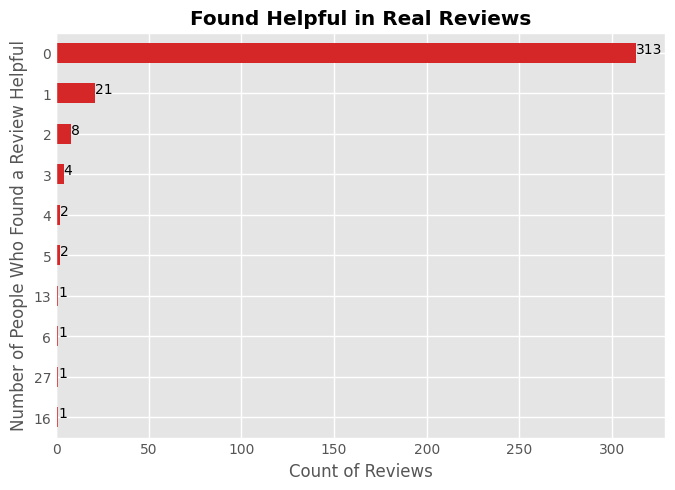

In [33]:
plt.figure( figsize=(7,5))
s = df_fake['found_helpful'].value_counts().sort_values()
ax = s.plot(kind='barh', color='tab:red')
[ax.text(v, i, v) for i, v in enumerate(s)]
plt.title('Found Helpful in Fake Reviews', fontweight='bold')
plt.xlabel('Count of Reviews')
plt.ylabel('Number of People Who Found a Review Helpful')
#plt.tight_layout()
plt.show()

# Name

In [38]:
df_true['name'].value_counts()

Amazon Customer              22
Ashley                        2
James                         2
Don                           2
kevon                         2
Bill                          1
changeling                    1
Rosalinda Ramos               1
B                             1
bean2626                      1
Tonya B.                      1
Dave                          1
K. Jones                      1
F4L2OYD                       1
Lindsey                       1
Gabriella Ramirez             1
ezza                          1
Hikaru Katayama               1
Susanne Chan                  1
J. Stroup                     1
GingerNW                      1
Winston A.                    1
TightMan                      1
jessy5377                     1
Eddi                          1
Mommyonthego                  1
N. Hash                       1
Maria                         1
Citizen_Steve                 1
Gary B.                       1
courtney                      1
Andrea  

In [39]:
df_fake['name'].value_counts()

Amazon Customer                 24
kelly                            3
Will                             3
Caio                             2
Average Consumer                 2
Farzad T.                        2
John Robbins                     2
DED                              2
Harish Shah                      2
Anthony B.                       2
James D. Nichols                 2
katelyn                          1
VICTORIA E MONTOYA GALLEGO       1
Mr Record Man                    1
krystie magness                  1
Jay yarbrough                    1
Charles                          1
ELutz                            1
Belinda                          1
Brian                            1
John                             1
Amanda                           1
M.L.                             1
Wanda Gettys                     1
Katie Howard                     1
Rosanne Lopez                    1
Michael Norton                   1
jean c                           1
Keith A. Otto       

# Vine voices

In [42]:
df_true['is_vine_voice'].value_counts()

False    380
True      10
Name: is_vine_voice, dtype: int64

In [43]:
df_fake['is_vine_voice'].value_counts()

False    313
True      41
Name: is_vine_voice, dtype: int64

# Images

In [44]:
df_true['has_images'].value_counts()

False    339
True      51
Name: has_images, dtype: int64

In [45]:
df_fake['has_images'].value_counts()

False    248
True     106
Name: has_images, dtype: int64

# Verified purchase

In [46]:
df_true['verified_purchase'].value_counts()

True     363
False     27
Name: verified_purchase, dtype: int64

In [47]:
df_fake['verified_purchase'].value_counts()

True     287
False     67
Name: verified_purchase, dtype: int64

# Keywords

In [72]:
from multi_rake import Rake
import yake
rake = Rake()
kw_extractor = yake.KeywordExtractor(n=3)

In [107]:
def get_keywords(text):
    '''
    Use 2 popular libraries Yake and Rake for rule-based keyword extraction,
    merge and deduplicate the final result 
    '''
    keywords1 = rake.apply(text)
    keywords2 = kw_extractor.extract_keywords(text)
    #print(keywords1)
    #print(keywords2)
    keywords1 = [w for w in keywords1 if w[1]>1.0]
    keywords  = keywords1 + keywords2
    keywords  = [i[0] for i in keywords]
    
    to_exclude = []
    for idx1, w1 in enumerate(keywords):
        for idx2, w2 in enumerate(keywords):
            if idx1 == idx2 or idx2 in to_exclude:
                continue
            elif w1 in w2:
                to_exclude.append(idx1)
                break
    return [w for idx, w in enumerate(keywords) if idx not in to_exclude]

In [108]:
text = df_true['text'].values[3]
text

'Very comfortable headphones to wear. As a person wearing glasses, it is almost impossible to get a good fit where it is not pressing on the legs of my glasses. These headphones are fine addressing that problem but what I like is the foam is really soft and fits well on my ears.\nI was very impressed with the automatic noise cancelling feature. You can really tell the difference when you turn it that is suppresses the background white noise.\nCharge holds okay but it will take time to really have an opinion on it.\nHappy with the headphones.'

In [109]:
get_keywords(text)

['background white noise',
 'charge holds',
 'person wearing glasses',
 'comfortable headphones',
 'headphones to wear',
 'good fit',
 'noise cancelling feature',
 'fine addressing',
 'addressing that problem',
 'fits',
 'automatic noise cancelling']

In [110]:
df_true['kw'] = df_true['text'].apply(get_keywords)
df_fake['kw'] = df_fake['text'].apply(get_keywords)

In [111]:
kw1 = [item for sublist in df_true['kw'].tolist() for item in sublist]
c1 = Counter(kw1)
c1.most_common()

[('Verified Purchase', 228),
 ('verified purchase', 191),
 ('sound quality', 81),
 ('battery life', 50),
 ('price', 44),
 ('noise cancellation', 31),
 ('headphones', 26),
 ('charging case', 25),
 ('good', 22),
 ('great', 21),
 ('comfortable', 19),
 ('bought', 17),
 ('pretty good', 16),
 ('sound', 15),
 ('ears', 15),
 ('noise canceling', 14),
 ('case', 14),
 ('earbuds', 14),
 ('time', 13),
 ('ear buds', 13),
 ('highly recommend', 12),
 ('phone calls', 11),
 ('work', 11),
 ('hear', 11),
 ('long time', 10),
 ('pair', 10),
 ('noise cancelling', 10),
 ('wireless earbuds', 10),
 ('music', 9),
 ('great product', 9),
 ('recommend', 9),
 ('n’t', 8),
 ('product', 8),
 ('pleasantly surprised', 8),
 ('hours', 8),
 ('work great', 8),
 ('pair of headphones', 8),
 ('great sound', 8),
 ('audio quality', 8),
 ('fit', 8),
 ('great price', 8),
 ('sound great', 8),
 ('price point', 8),
 ('noise', 7),
 ('great sound quality', 7),
 ('listening to music', 7),
 ('days', 7),
 ('good quality', 7),
 ('put', 7),


In [112]:
kw2 = [item for sublist in df_fake['kw'].tolist() for item in sublist]
c2 = Counter(kw2)
c2.most_common()

[('sound quality', 85),
 ('battery life', 41),
 ('highly recommend', 31),
 ('price', 21),
 ('long time', 16),
 ('price point', 16),
 ('comfortable', 16),
 ('headphones', 16),
 ('easy', 14),
 ('recommend', 14),
 ('bluetooth headphones', 13),
 ('good', 13),
 ('great', 13),
 ('charging case', 12),
 ('wireless headphones', 12),
 ('phone calls', 11),
 ('boloxa a17', 11),
 ('ears', 11),
 ('great sound', 11),
 ('work', 11),
 ('wireless charging', 10),
 ('Bluetooth headphones', 10),
 ('united states', 10),
 ('good quality', 10),
 ('Verified Purchase', 10),
 ('bought', 10),
 ('loves', 10),
 ('case', 9),
 ('love', 9),
 ('pair', 9),
 ('good sound', 9),
 ('work great', 9),
 ('great product', 9),
 ('ear hooks', 8),
 ('ear buds', 8),
 ('time', 8),
 ('great price', 8),
 ('snug fit', 8),
 ('recently purchased', 8),
 ('Battery life', 8),
 ('hear', 8),
 ('headphones are great', 8),
 ('Sound quality', 8),
 ('purchase', 8),
 ('long battery life', 7),
 ('noise cancellation', 7),
 ('fit snugly', 7),
 ('sing

In [115]:
# save to pickle
file = 'source/df_true_v2.pkl'
df_true.to_pickle(file)

# save to pickle
file = 'source/df_fake_v2.pkl'
df_fake.to_pickle(file)